<a href="https://colab.research.google.com/github/realmistic/PythonInvest-basic-fin-analysis/blob/master/PythonInvest_com_3_Scraping_financial_data_Earnings_per_share_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Scraping Financial Data (EPS) with Python**
* **What?** Get Earning-per-share (EPS) data scrapped from the Yahoo Finance Website in Python using BeautifulSoup library
* **Why?** EPS is one of the most important financial indicators, which is tracked by analysts. It is updated during the quartely Earning Calls, and it may be a big driver of a stock's price change.
* **How?**
  * Get the raw data with the ***Requests*** library
  * Extract data with ***BeautifulSoup***
  * Data cleaning in ***Pandas***
  * Basic visualisation of a dataframe (scatterplot and histogram)

  * **Full text** 
    * The detailed article on my website: https://pythoninvest.com/long-read/scraping-earnings-per-share-eps

## 1) IMPORTS

In [1]:
# https://pypi.org/project/beautifulsoup4/

!pip install beautifulsoup4

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

## 2) Scraping web data with Requests library
* Screenshot: 

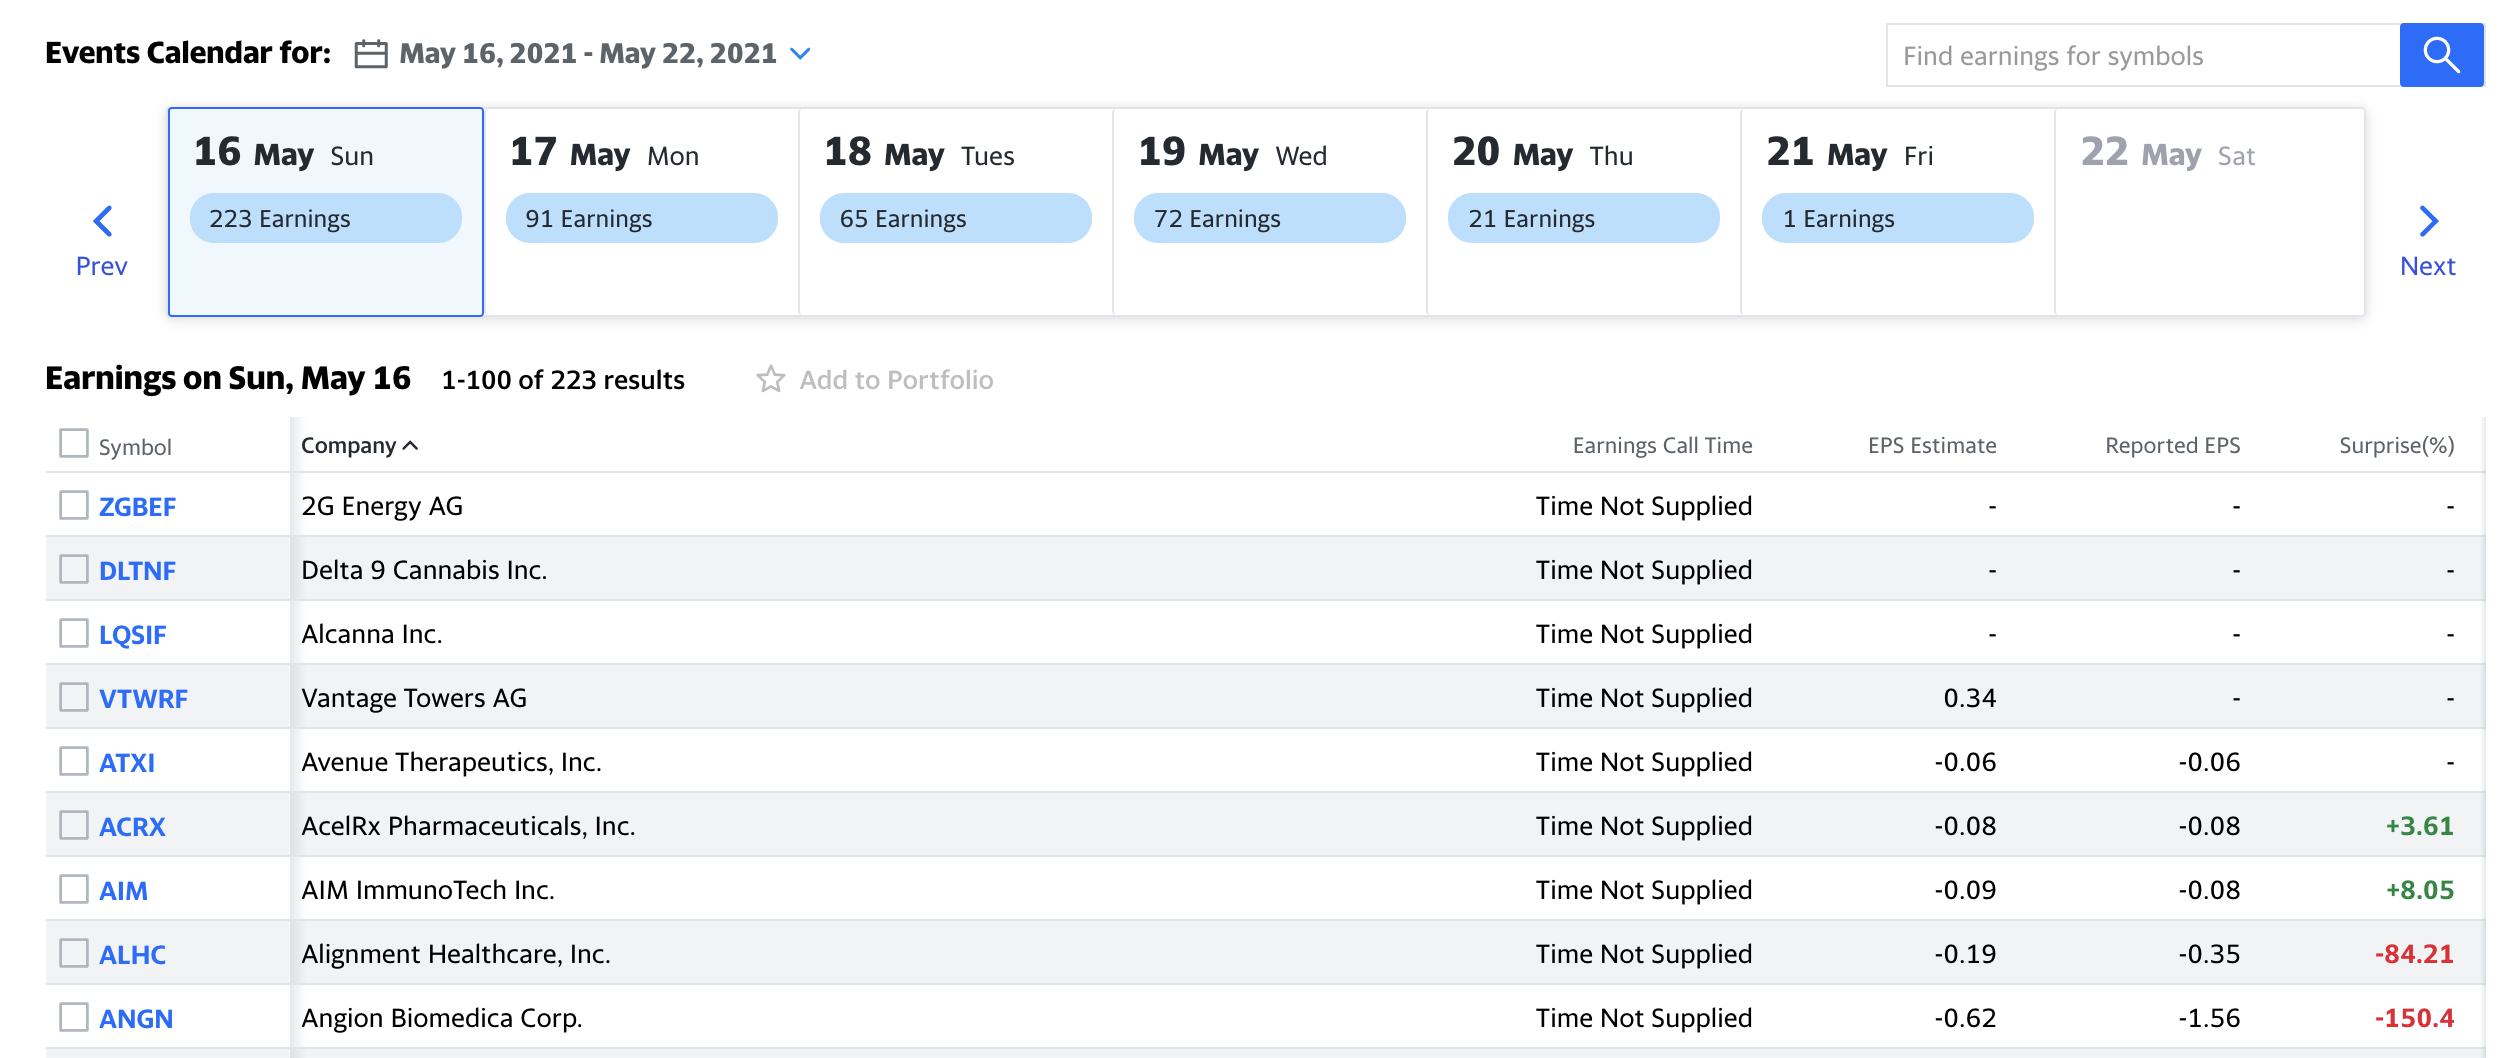

In [3]:
# https://finance.yahoo.com/calendar/earnings?from=2021-04-25&to=2021-05-01&day=2021-04-28&offset=100&size=100
# https://finance.yahoo.com/calendar/earnings?from=2021-05-16&to=2021-05-22&day=2021-05-18
url = "https://finance.yahoo.com/calendar/earnings?from=2021-05-16&to=2021-05-22&day=2021-05-16"

In [4]:
r = requests.get(url)
r.ok

True

In [5]:
r.status_code

200

In [6]:
r.text

'<!DOCTYPE html><html id="atomic" class="NoJs desktop" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark(\'PageStart\');</script><meta charset="utf-8"/><title>Company Earnings Calendar - Yahoo Finance</title><meta name="keywords" content="Earnings Announcements, Company Earnings, EPS Estimates, Earnings Per Share, Conference Calls, Before Market Open, After Market Close"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="458584288257241"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Learn when companies announce their quarterly and annual earnings, along with the latest EPS estimates and conference call times from Yahoo Finance."/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><meta name="msvali

## 3) Extract tags data with BeautifulSoup

In [7]:
soup = BeautifulSoup(r.text)

In [8]:
table = soup.find_all('table')

In [9]:
table

[<table class="W(100%)" data-reactid="17"><thead data-reactid="18"><tr class="C($tertiaryColor) BdB Bdbc($seperatorColor)" data-reactid="19"><th class="Ta(start) Pstart(6px) Pend(10px) W(10%) Miw(85px) Bgc($lv3BgColor) Fz(xs) Va(m) Py(5px)! Fw(400)! Ta(start) Start(0) Pend(10px) Pos(st) Bgc($lv3BgColor) " data-reactid="20"><label class="Ta(c) Pos(r) Va(tb) Pend(5px) D(n)--print" data-reactid="21"><input class="Pos(a) V(h)" data-reactid="22" type="checkbox"/><svg class="Va(m)! H(16px) W(16px) Stk($plusGray)! Fill($plusGray)! Cur(p)" data-icon="checkbox-unchecked" data-reactid="23" height="16" style="fill:#000;stroke:#000;stroke-width:0;vertical-align:bottom;" viewbox="0 0 24 24" width="16"><path d="M3 3h18v18H3V3zm19-2H2c-.553 0-1 .448-1 1v20c0 .552.447 1 1 1h20c.552 0 1-.448 1-1V2c0-.552-.448-1-1-1z" data-reactid="24"></path></svg></label><span data-reactid="25">Symbol</span><div class="W(3px) Pend(5px) Pos(a) Start(100%) T(0) H(100%) Bg($pfColumnFakeShadowGradient) Pe(n)" data-reactid

In [10]:
# Just 1 table found which is good
len(table)

1

In [11]:
# Get all column names
spans = soup.table.thead.find_all('span')

In [12]:
columns = []
for span in spans:
  print(span.text)
  columns.append(span.text)

Symbol
Company
Earnings Call Time
EPS Estimate
Reported EPS
Surprise(%)


In [13]:
rows = soup.table.tbody.find_all('tr')

In [14]:
# 100 rows in the table
len(rows)

100

In [15]:
# read row by row
stocks_df = pd.DataFrame(columns=columns)

for row in rows:
  elems = row.find_all('td')
  dict_to_add = {}
  for i,elem in enumerate(elems):
    dict_to_add[columns[i]] = elem.text
    # if i<=2:
    #   dict_to_add[columns[i]]=elem.text
    # else:  
    #   dict_to_add[columns[i]]= float(elem.text)
  stocks_df = stocks_df.append(dict_to_add, ignore_index=True) 

In [16]:
stocks_df

,Symbol,Company,Earnings Call Time,EPS Estimate,Reported EPS,Surprise(%)
0,ZGBEF,2G Energy AG,Time Not Supplied,-,-,-
1,DLTNF,Delta 9 Cannabis Inc.,Time Not Supplied,-,-,-
2,ANGN,Angion Biomedica Corp.,Time Not Supplied,-0.62,-1.56,-150.4
3,ACET,"Adicet Bio, Inc.",Time Not Supplied,-0.49,-0.82,-68.03
4,ACRX,"AcelRx Pharmaceuticals, Inc.",Time Not Supplied,-0.08,-0.08,+3.61
...,...,...,...,...,...,...
95,COMS,COMSovereign Holding Corp.,Time Not Supplied,-,-,-
96,CLOV,"Clover Health Investments, Corp.",Time Not Supplied,-0.11,-0.13,-17.12
97,GRAMF,TPCO Holding Corp.,Time Not Supplied,-0.11,0.23,+300
98,XL,XL Fleet Corp.,Time Not Supplied,-0.04,-0.07,-100


## 4) Data cleaning in Pandas

In [17]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Symbol              100 non-null    object
 1   Company             100 non-null    object
 2   Earnings Call Time  100 non-null    object
 3   EPS Estimate        100 non-null    object
 4   Reported EPS        100 non-null    object
 5   Surprise(%)         100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [18]:
filter1 = stocks_df['Surprise(%)']!='-'
filter2 = stocks_df['EPS Estimate']!='-'
filter3 = stocks_df['Reported EPS']!='-'

stocks_df_noMissing = stocks_df[filter1 & filter2 & filter3]

In [19]:
stocks_df_noMissing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 2 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Symbol              60 non-null     object
 1   Company             60 non-null     object
 2   Earnings Call Time  60 non-null     object
 3   EPS Estimate        60 non-null     object
 4   Reported EPS        60 non-null     object
 5   Surprise(%)         60 non-null     object
dtypes: object(6)
memory usage: 3.3+ KB


In [20]:
stocks_df_noMissing.head()

,Symbol,Company,Earnings Call Time,EPS Estimate,Reported EPS,Surprise(%)
2,ANGN,Angion Biomedica Corp.,Time Not Supplied,-0.62,-1.56,-150.4
3,ACET,"Adicet Bio, Inc.",Time Not Supplied,-0.49,-0.82,-68.03
4,ACRX,"AcelRx Pharmaceuticals, Inc.",Time Not Supplied,-0.08,-0.08,+3.61
5,AIM,AIM ImmunoTech Inc.,Time Not Supplied,-0.09,-0.08,+8.05
6,ALHC,"Alignment Healthcare, Inc.",Time Not Supplied,-0.19,-0.35,-84.21


In [21]:
stocks_df_noMissing['EPS Estimate'] = stocks_df_noMissing['EPS Estimate'].astype(float)
stocks_df_noMissing['Reported EPS'] = stocks_df_noMissing['Reported EPS'].astype(float)
stocks_df_noMissing['Surprise(%)'] = stocks_df_noMissing['Surprise(%)'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [22]:
stocks_df_noMissing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 2 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              60 non-null     object 
 1   Company             60 non-null     object 
 2   Earnings Call Time  60 non-null     object 
 3   EPS Estimate        60 non-null     float64
 4   Reported EPS        60 non-null     float64
 5   Surprise(%)         60 non-null     float64
dtypes: float64(3), object(3)
memory usage: 3.3+ KB


In [23]:
stocks_df_noMissing.set_index('Symbol', inplace=True)

In [24]:
stocks_df_noMissing.head()

,Company,Earnings Call Time,EPS Estimate,Reported EPS,Surprise(%)
Symbol,,,,,
ANGN,Angion Biomedica Corp.,Time Not Supplied,-0.62,-1.56,-150.40
ACET,"Adicet Bio, Inc.",Time Not Supplied,-0.49,-0.82,-68.03
ACRX,"AcelRx Pharmaceuticals, Inc.",Time Not Supplied,-0.08,-0.08,3.61
AIM,AIM ImmunoTech Inc.,Time Not Supplied,-0.09,-0.08,8.05
ALHC,"Alignment Healthcare, Inc.",Time Not Supplied,-0.19,-0.35,-84.21


In [25]:
stocks_df_noMissing[stocks_df_noMissing.index=='ABG']

,Company,Earnings Call Time,EPS Estimate,Reported EPS,Surprise(%)
Symbol,,,,,


## 5) Basic Visualisation (Scatteroplot, Histogram)

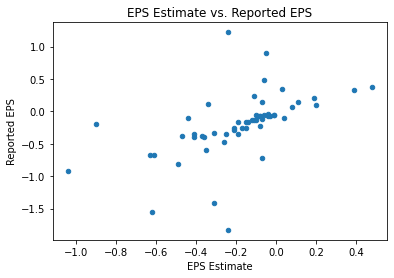

In [29]:
stocks_df_noMissing[np.abs(stocks_df_noMissing['Reported EPS'])<=2].plot.scatter('EPS Estimate', 'Reported EPS', title='EPS Estimate vs. Reported EPS')

In [30]:
stocks_df_noMissing[np.abs(stocks_df_noMissing['Reported EPS'])<=2]['Surprise(%)'].describe()

count      56.000000
mean       19.714286
std       402.078372
min      -928.570000
25%       -71.430000
50%       -12.075000
75%        14.105000
max      1900.000000
Name: Surprise(%), dtype: float64

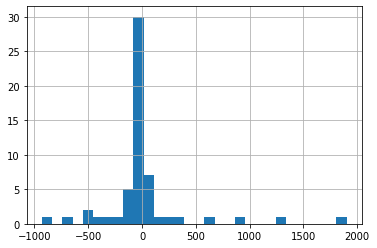

In [31]:
stocks_df_noMissing[np.abs(stocks_df_noMissing['Reported EPS'])<=2]['Surprise(%)'].hist(bins=30)

**What's next?**: 
* Get the stock jump around the reporting date? 
* Does it correlate with the Surprise (positive or negative)?

* **Detailed article** with automatisation of scrapping and stock prices jumps around 
the reporting dates analysis: https://pythoninvest.com/long-read/scraping-earnings-per-share-eps
* **Full analysis on top 200 stocks in the  article**: https://pythoninvest.com/long-read/developing-short-term-investment-strategy-based-on-esp